# Logistic Regression

In [12]:
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tools.utilities import plot_classification


def sigmoid(x):
    return 1/(1+np.exp(-x))

Likelihood Function

To derive the loss function, we first need to use the maximum likelihood estimation (MLE)

We want to maximize the likelihood of correctly predicting the output y

$$
P(y_i = 1 | x_i; w) = sigmoid(w^T x_i) = y\_pred \\
P(y_i = 0 | x_i; w) = 1 - sigmoid(w^T x_i) = 1 - y\_pred
$$

Combining the likelihood of both binary cases:

$$
\begin{align}
\text{Likelihood} &= \prod_{i}^{N} \left(sigmoid(w^T x_i)^y \cdot (1 - sigmoid(w^T x_i))^{(1-y)} \right) \\
&= \prod_{i}^{N} \left(y\_pred^y \cdot (1 - y\_pred)^{(1-y)}\right)
\end{align}
$$

In [13]:
def likelihood(X, w, y):
    y_pred = sigmoid(np.dot(X, w))
    return y_pred ** y * (1 - y_pred) ** (1 - y)
    

To simplify the calculations, we will take the log of the likelihood function

$$
\text{Likelihood} = \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

and the loss function is just the negative of that

$$
\text{Loss} = - \text{Likelihood} = - \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

In [14]:
def loss(X, w, y):
    return -np.log(likelihood(X, w, y))

Now to optimize the loss function, we need to derive the gradient of the loss function

$$
\begin{align*}
\frac{\partial \text{Loss}}{\partial w} = \frac{\partial}{\partial w} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right) \\ 
\because \frac{\partial y\_pred}{\partial x} = \frac{\partial \sigma(x)}{\partial x} = \sigma(x)(1 - \sigma(x)) \\
\therefore -y \frac{y\_pred (1 - y\_pred)}{y\_pred} \; x + (1 - y) \frac{y\_pred (1 - y\_pred)}{1-y\_pred} \; x \tag*{(Applying chain rule)} \\
-y (1 - y\_pred) \cdot x + (1 - y) y\_pred \cdot x \tag*{(Simplification)} \\
(y - y\_pred) \cdot x \tag*{(Simplifying further)} \\
\end{align*}
$$

In [15]:
def loss_gradient(X, w, y):
    """Compute the gradient of the neg-log-loss

    Args:
        X (n_samples, n_features)
        w (n_features)
        y (n_samples)

    Returns: gradient of the loss function (n_features)
    """
    y_pred = sigmoid(np.dot(X, w))
    return np.dot(X.T, (y_pred - y))

Putting all together

In [16]:
def logistic_regression(X, y, learning_rate=0.0001, max_iter=1000):
    print("Feature matrix X:\n", X[:2])
    print("Target labels y:\n", y[:2])
    
    # initialize the weights to zero, the weight dimension is the same as the number of features
    w = np.zeros(X.shape[1])
    y_pred = sigmoid(np.dot(X, w))

    # plot the relationship between the random predictions and labels
    plot_classification(y, y_pred, "before running logistic regression")
    
    for i in range(max_iter):
        if i % (max_iter // 10) == 0:
            print(f"Iteration {i}: {np.mean(loss(X, w, y))=}")

        # update weights
        w -= learning_rate * loss_gradient(X, w, y)
    return w

To Test the implementation

Feature matrix X:
 [[-7.48082054e-01 -6.56308148e-01  1.44372033e-01 -8.14276761e-01
   1.22986069e+00  1.47477803e-01 -3.27952813e+00 -1.38928813e+00
   1.07209497e+00  2.23330580e+00 -1.65089188e-01 -9.56767277e-01
   9.16911232e-02 -8.51125243e-01  8.29723926e-01 -1.60158363e+00
  -8.05492829e-01 -2.66776064e-01  3.83038840e-01  1.09576470e+00
   8.65806323e-01  1.21586031e+00 -2.17131862e+00 -1.80346408e+00
   1.21891978e+00  1.67551866e+00  1.18671743e+00 -7.81981807e-01
  -1.90659426e+00  2.27722174e+00]
 [ 8.24595616e-01  1.32416551e-01  7.19527234e-01  2.68716545e+00
  -1.37455054e-01 -2.95508370e-02  1.92583075e+00  1.32981145e+00
  -8.33520125e-01 -1.62437830e+00  1.77750261e+00 -9.18200391e-01
   9.83353381e-02 -6.24043316e-01 -1.14032658e+00  2.07640685e-01
   3.26793433e-01 -1.90012467e+00  4.94279361e-01 -8.91700787e-01
   4.86620507e-01  3.38528275e-02 -8.99756333e-01  2.79608091e+00
  -1.33189212e+00  7.29569861e-01 -5.04578241e-02  1.03009030e+00
   1.91299610e-04 -1.4

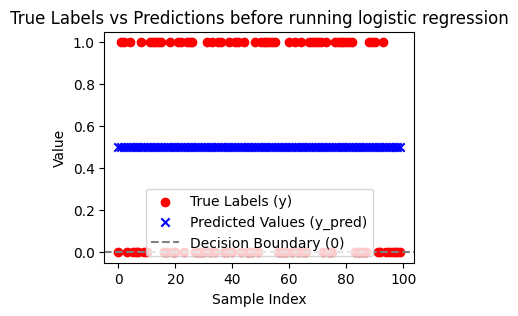

Iteration 0: np.mean(loss(X, w, y))=np.float64(0.6931471805599453)
Iteration 100: np.mean(loss(X, w, y))=np.float64(0.44474010358855587)
Iteration 200: np.mean(loss(X, w, y))=np.float64(0.3536940206998444)
Iteration 300: np.mean(loss(X, w, y))=np.float64(0.30567607270258657)
Iteration 400: np.mean(loss(X, w, y))=np.float64(0.2749306943162765)
Iteration 500: np.mean(loss(X, w, y))=np.float64(0.25298408403838685)
Iteration 600: np.mean(loss(X, w, y))=np.float64(0.23622579728638823)
Iteration 700: np.mean(loss(X, w, y))=np.float64(0.22283614779636807)
Iteration 800: np.mean(loss(X, w, y))=np.float64(0.21178585938339098)
Iteration 900: np.mean(loss(X, w, y))=np.float64(0.20244223609062906)


In [17]:
# Generate data
X, y = make_classification(n_samples=100, n_features=30)
learned_weights = logistic_regression(X, y, max_iter=1000)

Let's check the performance of the model, after running logistic regression

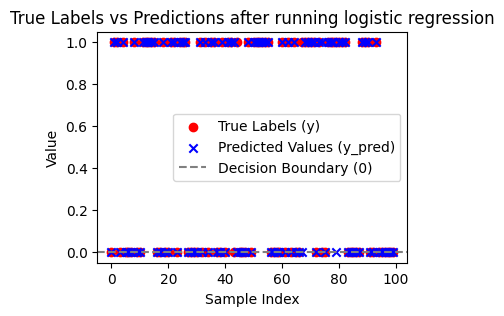

In [18]:
y_pred = (sigmoid(np.dot(X, learned_weights)) >= 0.5).astype(int) # we will use 0.5 as our threshold

plot_classification(y, y_pred, "after running logistic regression")